In [ ]:
# for google colab
%tensorflow_version 2.x

# 이미지 분류를 위한 CNN : Convolution Neural Network

## Digital Image
* 2차원, 3차원 배열
    * Width x Height x Channel(Color)
    * Channel : 0, 1, 3, 4
* Color Space(컬러 공간)
    * Gray Scale
        * 2차원 : Widht x Height
            * 또는
        * 3차원 : Widht X Height X 1
    * Color Scale
        * 3차원 : Weight X Height X 3
            * 또는
        * 3차원 : Weight X Height X 4
* 각 요소의 값 : 0 ~ 255

#### NumPy Array Image만들기

In [10]:
import numpy as np
import matplotlib.pyplot as plt

gray = np.zeros((120,120), dtype=np.uint8)   # 120x120 2차원 배열 생성, 검은색 흑백 이미지
gray[25:35, :] = 45                          # 25~35행 모든 열에 45 할당 
gray[55:65, :] = 115                         # 55~65행 모든 열에 115 할당 
gray[85:95, :] = 160                         # 85~95행 모든 열에 160 할당 
gray[:, 35:45] = 205                         # 모든행 35~45 열에 205 할당 
gray[:, 75:85] = 255      
print(gray.shape)

rgb = np.full((120,120, 3), fill_value=(255,255,255), dtype=np.uint8)    # 120x120 2차원 배열 생성, 3채널 컬러 이미지
rgb[25:35, :] = [255,0,0]                       # 25~35행 모든 열에 [255,0,0], 빨강색 할당 
rgb[55:65, :] = [0, 255, 0]                     # 55~65행 모든 열에 [0,255,0], 초록색 할당 
rgb[85:95, :] = [0,0,255]                       # 85~95행 모든 열에 [0,0,255], 파랑색 할당 
rgb[:, 35:45] = [255,255,0]                     # 모든행 35~45 열에 [255,255,0], 하늘색 할당 
rgb[:, 75:85] = [255,0,255]      
print(rgb.shape)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(rgb)
plt.show()

(120, 120)
(120, 120, 3)


## 이미지 다루기
* OpenCV
    * Intel에서 시작한 가장 영향력 있는 Computer Vision Library
    * C/C++, Python, Java 등 다양한 언어 지원
    * Python NumPy 지원
* PIL
    * PIL(Python Image Library) 프로젝트로 시작되었으나, 2009년 개발 중단
    * PIL을 fork한 Pillow 프로젝트 시작
* TF, Keras
    * `tf.keras.preprocessing.image`
    * `tf.image`
    * 내부적으로 PIL을 사용, PIL 설치 필수

### OpenCV Image 다루기
* 설치
    * `pip install opencv-python` 또는
    * `pip install opencv-contribe-python` 
* Import
    * `import cv2`
* 이미지 읽기
    * `img = cv2.imread('path')`
        *  `img` : NumPy Array, Color Channel : BGR
* Color Channel 변경 
    * `img[:,:,::-1]`
* Resize
    * `cv2.resize(img, (w,h))`

In [ ]:
#!pip install opencv-python --user
!pip install opencv-contrib-python --user

(444, 400, 3)
(444, 400, 3)
(100, 100, 3)


Text(0.5, 1.0, 'cv2.resize()')

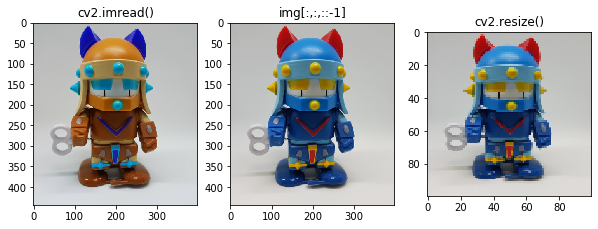

In [87]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('../img/tkv.jpg')
print(img.shape)

img2 = img[:,:,::-1]
print(img2.shape)

img3 = cv2.resize(img2, (100, 100))
print(img3.shape)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('cv2.imread()')

plt.subplot(1,3,2)
plt.imshow(img2)
plt.title('img[:,:,::-1]')

plt.subplot(1,3,3)
plt.imshow(img3)
plt.title('cv2.resize()')

### PIL(Pillow) 이미지 다루기
* 설치
    `pip install pillow`
* Import
    * `from PIL import Image`
* 이미지 읽기
    * `img = Image.open('path')`
        * `img` : PIL image 객체
* NumPy 변환
    * `arr = np.array(img)`
        * `arr` : NumPy Array, Color Channel : RGB
* Resize
    * `img.resize((w,h))

In [ ]:
!pip install pillow --user

In [88]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('../img/tkv.jpg')
print(type(img))

img_arr = np.array(img)
print(img_arr.shape)

img2 = img.resize((100, 100))

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('PIL.Image.open()')

plt.subplot(1,3,2)
plt.imshow(img_arr)
plt.title('np.array()')

plt.subplot(1,3,3)
plt.imshow(img2)
plt.title('PIL img.resize()')


<class 'PIL.JpegImagePlugin.JpegImageFile'>
(444, 400, 3)


Text(0.5, 1.0, 'PIL img.resize()')

###  TF 이미지 다루기
* `tf.keras.preprocessing.image`
    * `img = image.load_img(cat_path, target_size=(w, h))`
        * `img` : PILImage
    * `arr = image.img_to_array(img, data_format, dtype)`
        * `data_format` : 'channels_first', 'channels_last'
        * `dtype` : float32(defaul)
* `tf.io`
    * `tf.io.read_file(filename)`
    * `tf.io.decode_image(contents)`
* Resize
    * `tf.image.resize(image, (w, h))`

In [103]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

img1= tf.keras.preprocessing.image.load_img('../img/tkv.jpg')
img1_1 = tf.keras.preprocessing.image.img_to_array(img, dtype=np.uint8)
print(type(img1), type(img1_1))

img2 = tf.io.read_file('../img/tkv.jpg')
img2_2 = tf.io.decode_image(img2)
print(type(img2), img2.shape, type(img2_2), img2_2.shape)

img3 = tf.image.resize(img1_1, (100,100))

plt.figure(figsize=(12,10))
plt.subplot(2,3,1)
plt.imshow(img1)
plt.title('load_img')

plt.subplot(2,3,2)
plt.imshow(img1_1)
plt.title('img_to_array')

plt.subplot(2,3,3)
plt.imshow(img2_2)
plt.title('tf.io.decode_image()')

plt.subplot(2,3,4)
plt.imshow(img3)
plt.title('tf.image.resize()')

plt.subplot(2,3,5)
plt.imshow(img3.numpy().astype(np.uint8))
plt.title('tf.image.resize().numpy()')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'> () <class 'tensorflow.python.framework.ops.EagerTensor'> (444, 400, 3)


Text(0.5, 1.0, 'tf.image.resize().numpy()')

## CNN(합성곱 신경망)
* 이미지 인식에 탁월한 효과
* 이미지를 Neural Net 입력으로 사용
    * 입력 변수 갯수 : width x height x channel
        * 예) 800 x 600 RGB Image
            * 800 x 600 x 3 = 1,440,000
    * 너무 많다.
    * 대상 객체의 위치와 크기에 따라 데이타가 완전히 달라진다.
    * 의미 있는 특징(Feature) 변수, 패턴 만 골라내는 작업 필요
![](https://i.imgur.com/XMpfcHy.png)
![](https://i.imgur.com/OXqYf9e.png)
* CNN의 3가지 Layer
    * Convolution Layer
        * Feature (특징) 추출
        * 의미 없는 특징은 zero화 (0으로 제거)
    * Pooling Layer
        * 특징 갯수 축소
        * 중요한 특징만 유지
    * Fully-Connected Layer
        * 일반적인 Neural Network
        * 수집 된 최종 Feature 들로만 학습

![image.png](https://i.imgur.com/kRGEr0H.png)
* CNN Demo : https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html

## Convolution 연산
* 커널의 각 요소와 대응하는 입력 픽셀 값을 곱해서 모두 합한것
* kernel : 연산에 활용할 주변 픽셀 대상 선정
    * window, mask, filter 등의 이름으로 혼용
    * 커널 크기 : $n x n$, n은 일반적으로 홀수
* 컨볼루션 연산으로 블러링, 샤프닝 등의 필터 적용
* CNN의 목표는 적절한 커널을 학습하는 것


### TF Convolution API
* `tf.nn.conv2d(input,filter=None,strides=None,padding=None,...)`
    * `input` : 입력 tensor
        * shape : (batch, height, width, channel)
    * filter :  커널 형태 설정
        * ahep : (height, width, in_channel, out_channel)
    * strides : 커널 이동 간격
        * shape : (N, H, W, C)
            * shape length : 1,2,4
                * 1 : (n) = (1, n, n, 1)
                * 2 :(n, m) = (1, n, m, 1)
                * 4 :(n, h, w, c)
        * N: number of images(samples)
        * H : Height of the image
        * W : Width of the image
        * C : Channel(Color) count of the image
    * padding : 출력 보간 방법
        * Convolution 연산 후 생기는 외곽 영역 공백 채우기 기법
        * `SMAE` : 출력 크기를 입력 크기와 같게 채우기
        * `VALID` : 보간 없음


In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

img = np.arange(9).reshape(3,3)
print(f'input img: \n {img}')
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('input image')

x = np.float32(img.reshape(1,3,3,1))
print(f'input shape: {x.shape}')

filter = np.ones((2,2,1,1), dtype=np.float32) # 2x2 window, 1:in, 1:out
print(f'fillter:{filter.shape} \n{filter}')

stride = 1
fillterd = tf.nn.conv2d(x, filter, stride, padding='VALID')#SAME
print(f'filltered:\n {fillterd}')

out = fillterd.numpy().reshape(2,2)
print(f'out : {out}')

plt.subplot(1,2,2)
plt.imshow(out, cmap='gray')
plt.title('output image')
plt.show()

input img: 
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
input shape: (1, 3, 3, 1)
fillter:(2, 2, 1, 1) 
[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
filltered:
 [[[[ 8.]
   [12.]]

  [[20.]
   [24.]]]]
out : [[ 8. 12.]
 [20. 24.]]


### Conv2d를 이용한 평균 블러링

Text(0.5, 1.0, 'blur filltered')

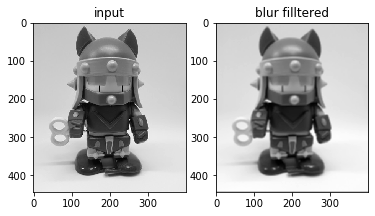

In [6]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('../img/tkv.jpg', cv2.IMREAD_GRAYSCALE)
(h,w) = img.shape

x = img.reshape(1,h,w,1).astype(np.float32)

win_size = 5
'''
filter = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04]])
filter = filter.reshape(win_size,win_size,1,1)
'''
filter = np.ones((win_size,win_size,1,1))/win_size**2

blured = tf.nn.conv2d(x, filter, 1, padding='SAME')
blured = blured.numpy().reshape(h,w).astype(np.uint8)

# 결과 출력
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title("input")
plt.subplot(122)
plt.imshow(blured, cmap='gray')
plt.title("blur filltered")

(5, 5, 3, 3)
[[0.04 0.   0.  ]
 [0.   0.04 0.  ]
 [0.   0.   0.04]]


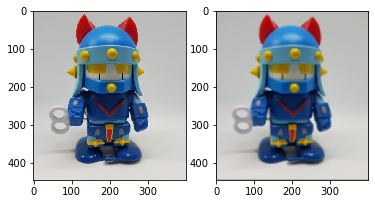

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('../img/tkv.jpg')

(h,w,c) = img.shape
x = img.reshape(1,h,w,c).astype(np.float32)

win_size = 5
fillter = np.zeros((win_size,win_size,c,c), dtype=np.float32)
fillter[:,:] = np.eye(3) * (1/(win_size**2))
print(fillter.shape)
print(fillter[0,0])
conv2d = tf.nn.conv2d(x, fillter, 1, padding='SAME')
blured = conv2d.numpy()

#blured = blured.reshape(h,w,c).astype(np.uint8)
blured = np.squeeze(blured).astype(np.uint8)
# 결과 출력
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(blured[:,:,::-1])


### Conv2d를 이용한 엣지 검출

Text(0.5, 1.0, 'gx + gy')

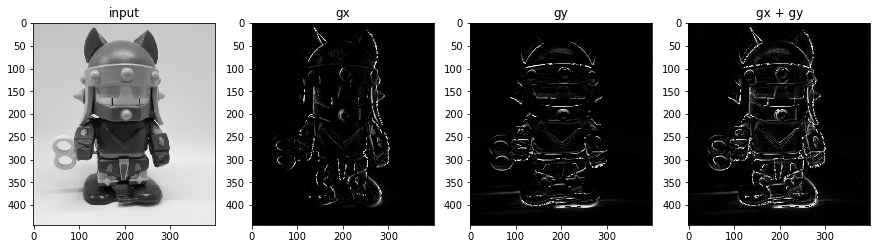

In [7]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('../img/tkv.jpg', cv2.IMREAD_GRAYSCALE)
(h,w) = img.shape
x = img.reshape(1,h,w,1).astype(np.float32)

# x 방향 미분 커널
gx_k = np.array([[-1,0,1],
                 [-2,0,2],
                 [-1,0,1]])
gx_k = gx_k.reshape((3,3,1,1))

# y 방향 미분 커널
gy_k = np.array([[-1,-2,-1],
                 [0,0,0],
                 [1,2,1]])
gy_k = gy_k.reshape((3,3,1,1))

gx = tf.nn.conv2d(x, gx_k, [1,1,1,1], padding='SAME')
gx = gx.numpy()
gx[gx < 0 ] = 0  #음수 처리
gx = gx.reshape(h,w).astype(np.uint8)

gy = tf.nn.conv2d(x, gy_k, [1,1,1,1], padding='SAME')
gy = gy.numpy()
gy[gy < 0 ] = 0  #음수 처리
gy = gy.reshape(h,w).astype(np.uint8)

# 결과 출력
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(img, cmap='gray')
plt.title("input")
plt.subplot(142)
plt.imshow(gx, cmap='gray')
plt.title("gx")
plt.subplot(143)
plt.imshow(gy, cmap='gray')
plt.title("gy")
plt.subplot(144)
plt.imshow(gx + gy, cmap='gray')
plt.title("gx + gy")

### Convolution Feature Map(특징 맵)
![](https://i.imgur.com/ZwmQphu.png)
* Convolution Layer Parameter 갯수
    * $P = W + B $
    * $W = C \times K^2 \times N$
    * $B = N$
        * $P$ : 파라미터 갯수
        * $W$ : 가중치(Weight) 갯수
        * $B$ : 편향(bias) 갯수
        * $C$ : 입력 이미지 채널 수
        * $K$ : 커널 사이즈
        * $N$ : 커널(출력) 갯수
    
    

## 풀링 연산(Pooling)
* 특성맵을 다운 샘플링하는 역할, 입력 변수 량 축소
    * n x n 크기의 window
    * window 안에 있는 값 중 하나를 선택
        * 원본의 특징을 가장 잘 대표하는 값
            * 평균 풀링(Mean Pooling) : 평균 값 선택
            * 최대 풀링(Max Pooling) : 최대 값 선택
            * 최대 풀링이 우수한 연구 결과

#### Pooling을 이용한 특징 축소 사례
<video controls="controls" src="./assets/Top_breeder.mp4" width=640 height=480></video>
* 출처 : https://www.youtube.com/watch?v=f1fXCRtSUWU

#### Pooling을 이용한 특징 축소 사례 2
<video controls="controls" src="./assets/Avatar.mp4" width=640 height=480></video>
* 출처 :https://www.youtube.com/watch?v=U1KiC0AXhHg

## TF Max Pool
* `tf.nn.max_pool(value, ksize, strides, padding...)`
    * value : input
    * ksize : window size
    * strides : 이동 간격
        * shape : (N, H, W, C)
            * shape length : 1,2,4
                * 1 : (n) = (1, n, n, 1)
                * 2 :(n, m) = (1, n, m, 1)
                * 4 :(n, h, w, c)
    * padding: `{"VALID", "SAME"}`

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[[[4.]
   [5.]]

  [[7.]
   [8.]]]]


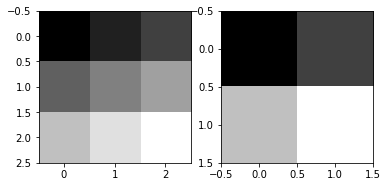

In [8]:
img = np.arange(9, dtype=np.float32).reshape(3,3)
print(img)
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

x = img.reshape(1,3,3,1)
ksize = 2 # [2,2] or [1,2,2,1]
strides = 1 # [1,1] or [1,1,1,1]

pool = tf.nn.max_pool(x, ksize=ksize, strides=strides, padding='VALID')
pooled = pool.numpy()
print(pooled)
plt.subplot(1,2,2)
plt.imshow(pooled.reshape(2,2), cmap='gray')
plt.show()

## MaxPool을 이용한 특징 검출

(1, 444, 400, 1)
(1, 44, 40, 1)


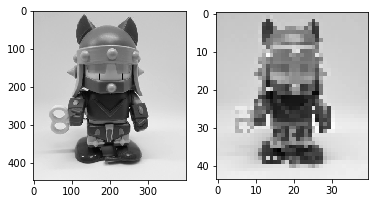

In [9]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('../img/tkv.jpg', cv2.IMREAD_GRAYSCALE)
(h,w) = img.shape[:2]

x = np.float32(img.reshape(1,h,w,1))
print(x.shape)

pooled = tf.nn.max_pool(x, ksize=[1,5,5,1], strides=[1,10,10,1], padding='VALID')
pooled = pooled.numpy()
print(pooled.shape)
pooled = pooled.squeeze()

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(pooled, cmap='gray')

## TF Low-Level API, MNIST
* MNIST 숫자 손글씨 분류를 CNN으로 구현

In [ ]:
import tensorflow as tf
import numpy as np

n_input = (28,28,1)
n_L1 = 300
n_L2 = 100
n_output = 10

(X_train, y_train_label), (X_test, y_test_label) = keras.datasets.mnist.load_data()
X_train, X_test = X_train[..., np.newaxis], X_test[..., np.newaxis]

X_train = X_train.astype(np.float32)/255.0
X_test = X_test.astype(np.float32)/255.0
X_valid, X_train = X_train[:5000], X_train[5000:]

y_valid_label, y_train_label = y_train_label[:5000], y_train_label[5000:]
y_train = np.eye(n_output)[y_train_label]
y_valid = np.eye(n_output)[y_valid_label]
y_test = np.eye(n_output)[y_test_label]


batch_size = 100
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(batch_size)

initializer =  tf.initializers.GlorotUniform() #xavier
W1 = tf.Variable(initializer([3, 3, 1, 32]))
W2 = tf.Variable(initializer([3, 3, 32, 64]))
W3 = tf.Variable(initializer([7 * 7 * 64, 256]))
W4 = tf.Variable(initializer([256, 10]))

def model(X, training=False):
    L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
    L1 = tf.nn.relu(L1)
    L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
    L2 = tf.nn.relu(L2)
    L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')    
    L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
    L3 = tf.matmul(L3, W3)
    L3 = tf.nn.relu(L3)
    if training:
        L3 = tf.nn.dropout(L3, 0.5)
    hyperthesis = tf.matmul(L3, W4)
    return hyperthesis

n_epochs = 10
step = 0

learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

for epoch in range(n_epochs):
    for X_batch, y_batch in train_ds:
        with tf.GradientTape() as tape:
            predict = model(X_batch, training=True)
            cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_batch, logits=predict))
        grads = tape.gradient(cost, [W1, W2, W3, W4])
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W1, W2, W3, W4]))
    
        is_correct = tf.equal(tf.argmax(predict, axis=1), tf.argmax(y_batch, axis=1))
        acc_train = tf.reduce_mean(tf.cast(is_correct, tf.float32))                              
    
    predict = model(X_valid, training=True)
    is_correct = tf.equal(tf.argmax(predict, axis=1), tf.argmax(y_valid, axis=1))
    acc_val = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    print(f"epoch:{epoch}, cost:{cost}, train accuracy:{acc_train}, validation accuracy:{acc_val}")

predict = model(X_test)
is_correct = tf.equal(tf.argmax(predict, axis=1), tf.argmax(y_test, axis=1))
acc_test = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print("Test Accuracy:{}".format(acc_test))

## MNIST, TF Keras High-Level API
* MNIST 숫자 손글씨 문제를 Keras API로 구현
* `tf.keras.layers.Conv2D(fitlers, kernel_size, strides, padding, activation)` :
    * `filters` : 필터의 갯수, 출력 층 수
    * `kernel_size` : 커널 크기
    * `strides` : 이동 간격
    * `padding` : 외곽 보간 방법, {"same", "valid"}
    * `activation` : 활성화 함수
* `tf.keras.layers.Flatten()` : 입력을 1차원으로 만들어서 출력, 배치 크기 무관
* `tf.kears.MaPool2D(pool_size, strides, padding)`

In [1]:
import tensorflow as tf
import numpy as np

n_input = 28*28
n_L1 = 300
n_L2 = 100
n_output = 10

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2, 2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu ), 
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(n_output, activation=tf.nn.softmax)
])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:{}".format(test_acc))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 76us/s

## 잘 알려진 CNN Models
* 최초의 CNN
* 더 깊어진 CNNs
* AlexNet,2012
* GoogLeNet(Inception V1),2014
* VGGNet(VGG-16,VGG-19),2014
* Inception-v3, 2015
* ResNet, 2015
* Xception, 2016
* DenseNet, 2016
* SqueezNet, 2016
* MobileNet, 2017

#### Neural Network Visualization
* TensorSpace
    * https://tensorspace.org/index.html

## LeNet, 최초의 CNN 모델
* Yann Andre LeCun(얀 르쿤)
    * 1960 ~ , French-American
    * Professor of New York Univ.
    * Vice Presidnet, Chief AI Scientist at Facebook
* LeNet
    * 최초의 CNN, 1998
    * 손글씨 숫자 인식를 목표로 생성
    * LeNet-1, 4, 5

### LeNet-5
![https://i.imgur.com/qT8oK6E.png](https://i.imgur.com/vEuGB3k.png)
![](https://i.imgur.com/262yB5m.png)

### LeNet-5 모델 생성
* 모델 변경사항
    * 활성화 함수 : tanh에서 relufh 변경
        * tanh보다 relu가 효과적 연구
    * Pooling : AveragePool에서 MaxPool로 변경
        * MaxPool이 가장 효과적
    * Dropout 추가

In [40]:
import tensorflow as tf
import numpy as np

def make_LeNet(input_shape=(32, 32,1), output=10):
    padding = 'valid'
    if input_shape[0] < 32:
        padding = 'same'
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(6, 5, padding=padding, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(16, 5, activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(120, 5, activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(84, activation='relu' ), 
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(output, activation='softmax')
    ])
    return model

model = make_LeNet()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_3 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 84)               

### LeNet-5을 이용한 MNIST
* 입력 이미지 크기 : 32x32에서 28x28로 변경
    * MNIST 이미지 자체가 28x28, 원본 이미지를 확대하는 것은 부적절

In [9]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

model = make_LeNet(input_shape=(28,28,1))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:{}".format(test_acc))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 51us/sample - loss: 0.3708 - accuracy: 0.8845 - val_loss: 0.0842 - val_accuracy: 0.9750
Epoch 2/10
55000/55000 [==============================] - 2s 43us/sample - loss: 0.1017 - accuracy: 0.9703 - val_loss: 0.0644 - val_accuracy: 0.9788
Epoch 3/10
55000/55000 [==============================] - 2s 43us/sample - loss: 0.0722 - accuracy: 0.9790 - val_loss: 0.0549 - val_accuracy: 0.9838
Epoch 4/10
55000/55000 [==============================] - 2s 43us/sample - loss: 0.0571 - accuracy: 0.9829 - val_loss: 0.0497 - val_accuracy: 0.9864
Epoch 5/10
55000/55000 [==============================] - 2s 44us/sample - loss: 0.0470 - accuracy: 0.9859 - val_loss: 0.0421 - val_accuracy: 0.9860
Epoch 6/10
55000/55000 [==============================] - 2s 44us/sample - loss: 0.0389 - accuracy: 0.9883 - val_loss: 0.0378 - val_accuracy: 0.9894
Epoch 7/10
55000/55000 [==============================] -

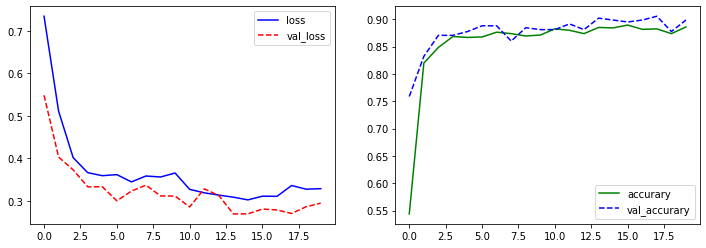

In [35]:
import matplotlib.pyplot as plt

def drawPlot(history):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], 'b', label="loss")
    plt.plot(history.history['val_loss'], 'r--', label="val_loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], 'g', label="accurary")
    plt.plot(history.history['val_accuracy'], 'b--', label="val_accurary")
    plt.legend()
    plt.show()
drawPlot(history)

### LeNet을 이용한 Fashion MNIST
* Fashion MNIST
    * MNIST에 영향을 받아서 만들어진 Dataset
    * 숫자 손글씨 대신, 옷, 신발, 가방 등 패션 용품이미지 10가지
    * 이미지 크기 28 x 28, 픽셀 값 :0~ 255
    * 훈련 데이타 60,000건
    * 테스트 테이타 10,000건
    * `tf.keras.datasets.fashion_mnist.load_data()`

(60000, 28, 28) (10000, 28, 28) 255


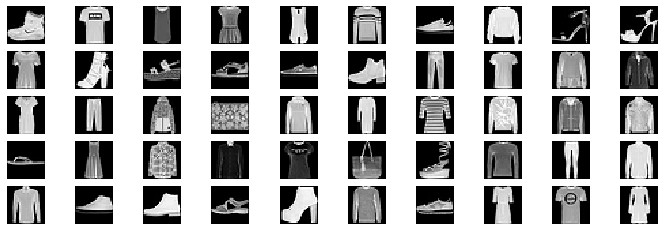

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

print(train_X.shape, test_X.shape, np.max(train_X))

plt.figure(figsize=(12,4))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(train_X[i], cmap='gray')
    plt.axis('off')
plt.show()

## Google Colab
* https://colab.research.google.com/
* 머신러닝, 데이타 분석 실험을 위한 무료 클라우드 서비스
    * 대부분의 모듈 이미 설치
    * tensorflow 2.x 사용을 위한 커맨드
        * `%tensorflow_version 2.x`
* 고성능 GPU/TPU 지원
    * Nvida K80, T4, P4, P100 등
* 리소스 한도
    * 최대 12시간, 유휴 시간에 따라
    * GPU 유형 선택 불가, 때에 따라 일시적 제한
        * 덜 쓴 사람에게 고 성능 리소스 제공, 안쓸 때는 닫아 둘것
    * 암호화폐 채굴 금지, 계정 잠김
* 타 서비스 연동 지원
    * Google Drive
    * GitHub
    * 실시간 협업(Collaborate)
* Local Runtime 지원
    * https://research.google.com/colaboratory/local-runtimes.html
    * Local Jupyter notebook과 Colab을 연동
    * 
* Colab Pro
    * 유료 서비스 :$9.99/월
* Tensorflow version
    * 기본이 1.5
    * 2.x를 사용하기 위한 매직 커맨드
        * `%tensorflow_version 2.x`
![](https://i.imgur.com/BlRaLuk.png)

###### Tensorflow 2.x를 사용하기 위한 매직 커맨드

In [68]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


#### LeNet을 이용한 Fashion MNIST 모델 훈련 및 테스트

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 3s 50us/sample - loss: 0.6815 - accuracy: 0.7508 - val_loss: 0.4217 - val_accuracy: 0.8486
Epoch 2/20
55000/55000 [==============================] - 2s 44us/sample - loss: 0.4191 - accuracy: 0.8493 - val_loss: 0.3437 - val_accuracy: 0.8734
Epoch 3/20
55000/55000 [==============================] - 2s 44us/sample - loss: 0.3610 - accuracy: 0.8706 - val_loss: 0.3245 - val_accuracy: 0.8796
Epoch 4/20
55000/55000 [==============================] - 2s 44us/sample - loss: 0.3297 - accuracy: 0.8820 - val_loss: 0.3134 - val_accuracy: 0.8828
Epoch 5/20
55000/55000 [==============================] - 2s 44us/sample - loss: 0.3067 - accuracy: 0.8892 - val_loss: 0.2831 - val_accuracy: 0.8954
Epoch 6/20
55000/55000 [==============================] - 2s 44us/sample - loss: 0.2864 - accuracy: 0.8966 - val_loss: 0.2735 - val_accuracy: 0.8986
Epoch 7/20
55000/55000 [==============================] -

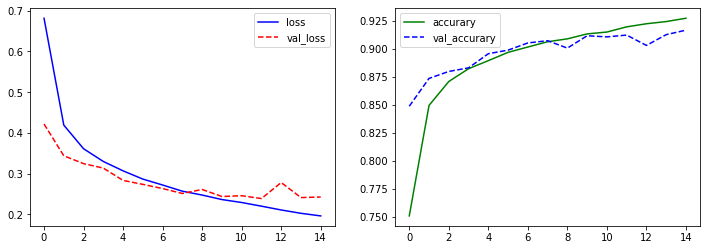

In [12]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()


train_X = train_X/255.0
test_X = test_X/255.0
train_X = train_X[..., tf.newaxis]
test_X = test_X[..., tf.newaxis]

valid_X, train_X = train_X[:5000], train_X[5000:]
valid_y, train_y = train_y[:5000], train_y[5000:]


model = make_LeNet(input_shape=(28,28,1), output=10)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 20
batch_size=100
history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, validation_data=(valid_X, valid_y), callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)])
test_loss, test_acc = model.evaluate(test_X, test_y, verbose=0)
print("Test Accuracy:{}".format(test_acc))

drawPlot(history)

#### Aumented Fashion MNIST 모델 훈련 및 테스트


## LeNet을 이용한 Hotdog vs Not Hotdog 분류
* https://www.youtube.com/watch?v=pqTntG1RXSY

In [1]:
%%html
<iframe width="786" height="442" src="https://www.youtube.com/embed/pqTntG1RXSY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Image Web Crawling
* selenium
    * 웹 브라우져 자동화 오픈소스 프레임웤
    * 원하는 웹 브라우져 구동
    * 설치
        * `!pip install selenium`
* 브라우져 드라이버
    * Chrome Driver
    * 설치
        * 윈도우 : 사용하는 브라우져 버전에 맞게 설치
            * https://sites.google.com/a/chromium.org/chromedriver/downloads
        * Colab
            * `!apt update`
            * `!apt install chromium-chromedriver`
* urllib
    * 파이썬 표준 라이브러리
    * `urllib.parse.urlparse(url)` : URL 해석
    * `urllib.request.urlopen(url)` : URL 요청

###### Selenum 설치

In [ ]:
!!pip install selenium

###### Colab Chromedriver 설치

In [ ]:
!apt update
!apt install chromium-chromedriver

###### google image download 함수  구현
* 구글 이미지 다운로드
    1. 검색어 입력
    2. 페이지 스크롤 다운, 검색 결과가 더 이상 없을 때 까지
    3. 화면에 로딩된 이미지의 URL 수집
    4. 수집된 이미지 URL로 부터 이미지를 로컬 드라이브에 저장
* `google_image_download(keyword, path, headless=True)`
    * `keyword` : 검색어
         * 1개 이상인 경우 "+" 기호로 연결
             * 예) `keyword=cat+dog` : cat, dog 검색
         * 제외할 검색어 "-" 붙여서 연결
             * 예) `keyword=animal+-cat` : animal 검색, cat 제외
     * `path` : 검색한 이미지 저장 디렉토리 경로
     * `headless` : 윈도우 창을 열지 않기
         * True : 브라우저 창 열지 않음, colab 같은 cloud 환경에서 필수
         * False : 브라우저 창 열어서 보기

         

In [28]:
from selenium import webdriver
import time
import urllib
import os

def google_image_download(keyword, path, headless=True):
    opt = webdriver.ChromeOptions()
    if headless:
        opt.add_argument('--headless')  # no GUI Window
    opt.add_argument('--no-sandbox') # with --headless opt, without a defined user.
    opt.add_argument('--disable-dev-shm-usage') # for linux , disable /dev/shm, shared memory
    opt.add_argument('--window_size=1280,1024')
    wd = webdriver.Chrome('chromedriver',options=opt)
    
    url = "https://www.google.co.in/search?q="+keyword+"&source=lnms&tbm=isch"
    wd.get(url)
    #print(wd.page_source)  # results

    body = wd.find_element_by_tag_name('body')
    print('loading img urls...')
    #scroll down 50 times
    for i in range(50):
        body.send_keys(webdriver.common.keys.Keys.PAGE_DOWN)
        time.sleep(0.5)
        try:
            more_btn = wd.find_element_by_css_selector('input[type=button].mye4qd')
            more_btn.click()
        except:
            pass
        print(f'\t scroll down({i})', end='\r')
    print('done', ' '*100)
    imgs = wd.find_elements_by_css_selector('img.rg_i')
    print('downloading img to local drive...')
    
    for i, img in enumerate(imgs):
        try:
            src = img.get_attribute('src')
            scheme = urllib.parse.urlparse(src).scheme
            if scheme == 'data':
                res = urllib.request.urlopen(src).file.read()
            elif scheme in ['http','https', 'HTTP', 'HTTPS'] :
                res = urllib.request.urlopen(src).read()

            if path is None:
                path = keyword
            if not os.path.exists(path):
                os.makedirs(path) 

            file = open(os.path.join(path, keyword + "_" + str(i) + ".jpg" ), "wb")
            file.write(res)
            file.close()
        except:
            print(f'\t {i+1}/{len(imgs)}, download fail.')
        print(f'\t {i+1}/{len(imgs)}', end='\r')
    print(f'done: {len(imgs)} images', ' '*100)
    wd.quit()

###### Hotdog 이미지 다운로드
* 검색어 : hotdog

In [26]:
google_image_download('hotdog', 'datasets/hotdog_or_not/hotdog', headless=False) # for windows , headleass=False
#google_image_download('hotdog', 'datasets/hotdog_or_not/hotdog', headless=True) # for colab , headleass=True

loading img urls...
done                                                                                                     
downloading img to local drive...
len(imgs) images done                                                                                                     


###### Not Hotdog 이미지 다운로드
* 검색어 : photo, picture
    * hotdog 검색 제외 : -hotdog

In [29]:
google_image_download('photo+picutre+-hotdog', 'datasets/hotdog_or_not/not_hotdog', headless=Fase) # for Windows, headless=True
#google_image_download('photo+picutre+-hotdog', 'datasets/hotdog_or_not/not_hotdog', headless=True) # for colab, headless=True

loading img urls...
done                                                                                                     
downloading img to local drive...
	 49/728, download fail.
done: 728 images                                                                                                     


## Image Data Augmentation(이미지 데이타 증식)
* 이미지 데이타 셋이 부족한 경우
* `gen = tf.keras.preprocessing.image.ImageDataGenerator(...)` : 이미지 데이타 증식 및 전처리
    * `rotation_range` :회전 범위
    * `width_sift_ragne` : 좌우 이동 범위
    * `height_sift_range` : 상하 이동 범위
    * `brightness_range` : 밝기 조절 범위
    * `sher_range` : 전단 변환(뒤틀기) 범위
    * `zoom_range` : 확대/축소 범위
    * `horizontal_flip` : 좌위 뒤집기 여부
    * `vertical_flip` : 상하 뒤집기
    * `fill_mode` : 새로운 픽셀 채우기 기법
    * `rescale` : 스케일 적용
    * `validation_split` : 0.1~1.0
* `gen.flow(x, y, batch_size, shuffle)` : 무한한 iterator 생성
* `gen.flow_from_directory(dir, target_size, classes, class_mode, subset, ...)` : 디렉토리에서 읽기, memory full 회피
    * `dir` : 디렉토리 경로
    * `target_size` : 이미지 크기, (height, width)
    * `classes` : 클래스 이름 예)\['dog','cat'\]
        * 생략시 `taret_dir`의 하위 디렉토리 이름을 사용
    * `class_mode` : 클래스 유형
        * `binary` : 1D binary label
        * `sparse` : 1D integer label
        * `categorical` : 2D one-hot encoded label
        * `input` : 입력 target으로, autoencode
    * `subset` : `training`, `validation`
    

#### Model 학습 적용
* `model.fit_generator(generator, steps_per_epoch, epochs, ...)`
* `model.fit()`

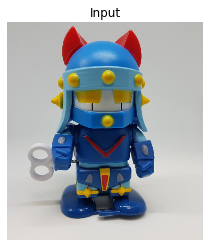

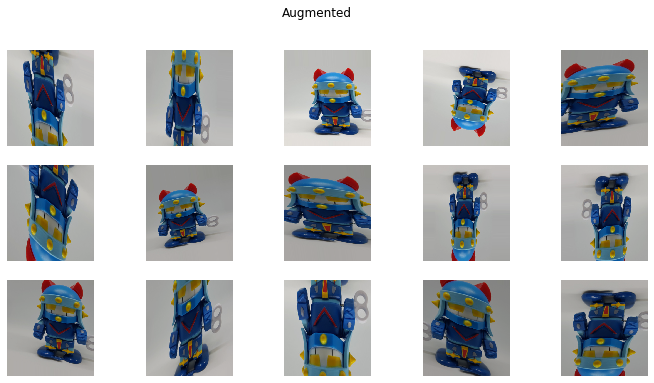

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

img = tf.keras.preprocessing.image.load_img('../img/tkv.jpg')
plt.imshow(img)
plt.axis('off')
plt.title("Input")
data = tf.keras.preprocessing.image.img_to_array(img)
data = np.expand_dims(data, axis=0)

gen = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=20,
                                                     rotation_range=10,
                                                     zoom_range=0.5,
                                                     width_shift_range=0.1,
                                                     height_shift_range=0.1,
                                                     horizontal_flip=True,
                                                     vertical_flip=True,
                                                     brightness_range=[0.7, 1])

loop = 15
plt.figure(figsize=(12,6))
plt.suptitle("Augmented")
for i, batch in enumerate(gen.flow(data)) :
    img = batch[0]
    plt.subplot(math.ceil(loop/5), 5, i+1)
    plt.imshow(img.astype(np.uint8))
    plt.axis('off')
    if i >= loop-1 :
        break

###### ImageDataGenerator 적용 및 미리보기
* train/validation set 나누기
    * `ImageDataGenerator(validation_split)`
        * `validation_split` : 0.1~1.0
        * `flow_from_directory(subset)`
            * `subset` : `training`, `validation`

Found 1149 images belonging to 2 classes.
Found 286 images belonging to 2 classes.
1149 18
286 5


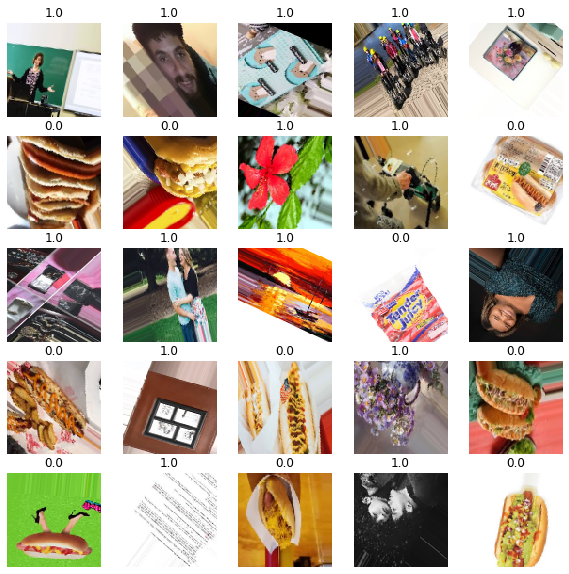

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt

img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0,
                                                     shear_range=0.2,
                                                     rotation_range=40,
                                                     zoom_range=0.2,
                                                     width_shift_range=0.2,
                                                     height_shift_range=0.2,
                                                     horizontal_flip=True,
                                                     vertical_flip=True,
                                                     validation_split=0.2)
IMG_SIZE = 100
dir_path = 'datasets/hotdog_or_not'
train_iter = img_gen.flow_from_directory(dir_path,
                                         shuffle=True,
                                         batch_size=64,
                                         target_size=(IMG_SIZE, IMG_SIZE),
                                         class_mode='sparse',
                                         subset='training')

valid_iter = img_gen.flow_from_directory(dir_path,
                                         shuffle=True,
                                         batch_size=64,
                                         target_size=(IMG_SIZE, IMG_SIZE),
                                         class_mode='sparse',
                                         subset='validation')


print(train_iter.samples, len(train_iter))
print(valid_iter.samples, len(valid_iter))

image_batch, label_batch = next(train_iter)

plt.figure(figsize=(10,10))
for n in range(25):
    plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(label_batch[n])
    plt.axis('off')

###### LeNet Model traning

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 96, 96, 6)         456       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 48, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 44, 44, 16)        2416      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 18, 18, 120)       48120     
_________________________________________________________________
flatten_4 (Flatten)          (None, 38880)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 84)               

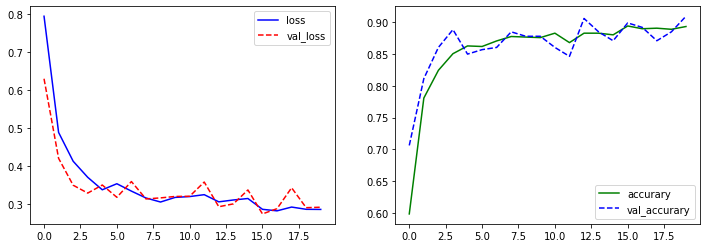

In [41]:
import os

model = make_LeNet(input_shape=(IMG_SIZE,IMG_SIZE,3),output=2)
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


epochs = 20
history = model.fit(train_iter, steps_per_epoch=len(train_iter),
                    validation_data=valid_iter, validation_steps=len(valid_iter),
                    epochs=epochs)

drawPlot(history)

###### Hotdog/Not Hotdog Example Test

['./img/examples\\bicycle.jpg', './img/examples\\c51ce410c124a10e0db5e4b97fc2af392.jpg', './img/examples\\car.jpg', './img/examples\\cat.jpg', './img/examples\\dog.jpg', './img/examples\\hotdog1.jpg', './img/examples\\hotdog2.jpg', './img/examples\\hotdog3.jpg', './img/examples\\manhattan.png', './img/examples\\motorbike.jpg', './img/examples\\night_sky.png', './img/examples\\shue.jpg']


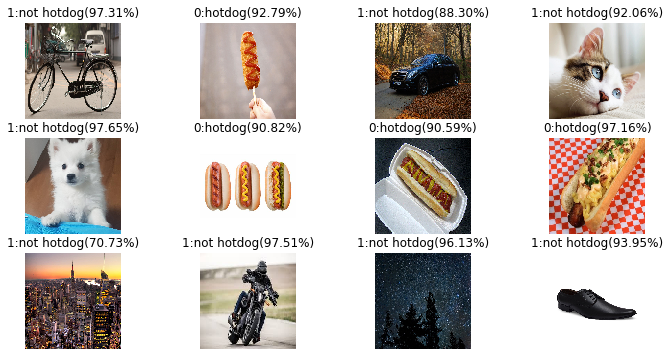

In [47]:
import math
from tensorflow.keras.preprocessing.image import img_to_array
import glob
import matplotlib.pyplot as plt

test_dir_path = './img/examples/*.*'
test_paths = glob.glob(test_dir_path)
print(test_paths)

labels = ['hotdog', 'not hotdog']

plt.figure(figsize=(12,6))
for i, path in enumerate(test_paths):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
    img_arr = tf.keras.preprocessing.image.img_to_array(img, dtype=np.uint8)
    img_arr = img_arr / 255.0
    img_arr = tf.expand_dims(img_arr, 0)

    pred = model.predict(img_arr)[0]
    label = tf.argmax(pred)
    plt.subplot(math.ceil(len(test_paths)/4), 4, i+1)
    plt.imshow(img)
    plt.title(f'{label}:{labels[label]}({pred[label]*100:.2f}%)')
    plt.axis('off')
plt.show()

## AlexNet, 더 깊은 CNN
* Alex Krizhevsky(알렉스 크리체프스키)
    * Toronto Univ.
    * Team of Prof. Geoffrey Hinton (박사 지도교수)
* 2012 ILSVRC(ImageNet Large Scale Visual Recognition Chanllenge,이미지넷 대회) 우승
    * top 5 error 15.4%
        * 2nd 26.2%

### AlexNet 구성
* 8개층
* 6천만여 개 파라미터
* 훈련 기간 6일, GTX 580 3GB GPU 2개
    * 2개의 GPU를 기반으로 한 병렬 구조
![](https://i.imgur.com/R18f2Ux.jpg)
![image.png](https://i.imgur.com/ogYy9Zv.jpg)

In [48]:
import tensorflow as tf

def make_AlexNet(input_shape=(227,227,3), output=1000):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(96, kernel_size=11, strides=4, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Conv2D(256, 5, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(3, 2),
        tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu'),                                         
        tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu'),                  
        tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),                                                                 
        tf.keras.layers.MaxPool2D(3, 2),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(9216, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(output, activation='softmax'),
    ])
    return model
model = make_AlexNet()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 256)      

### AlexNet으로 개,고양이 분류하기

#### Tensorflow-Datasets
* https://www.tensorflow.org/datasets/
* 바로 사용 가능하게 준비된 데이타 셋 모음
* tf.dataset 형태로 반환
* 설치
    *  `!pip install tensorflow-datasets`
* 주요 API
    * `tfds.list_builders()` :  데이타셋 목록
    * `ds = tfds.load(name, split)` : 데이타셋 다운로드 및 로딩
        * `name` : 데이타셋 이름
        * `split` : 분할 방법
        * `with_info` : tuple(tf.data.Dataset, tfds.core.DatsetInfo) 반환
        * `as_supervised` : dataset(input, label)

###### Tensorflow-Datasetsets 설치

In [ ]:
!pip install tensorflow-datasets

###### 준비된 데이타셋 목록 보기

In [106]:
import tensorflow_datasets as tfds
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'i_natura

###### 개, 고양이 이미지 데이타셋
* cats_vs_dogs
* train, test =  80 : 20 분할
* 데이타셋 메타 정보 확인

In [107]:
split=['train[:80%]', 'train[80%:90%]', 'train[90%:]']
(raw_train, raw_valid, raw_test), dsinfo = tfds.load('cats_vs_dogs',
                                               split=split,
                                               with_info=True,
                                               as_supervised=True)
dsinfo

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    ye

###### 훈련 이미지 미리보기

In [110]:
import matplotlib.pylab as plt

get_label_name = dsinfo.features['label'].int2str

plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(raw_train.take(9)):
    plt.subplot(3,3, i +1)
    plt.imshow(image)
    plt.title(f"{label} : {get_label_name(label)}")
    plt.axis('off')
plt.show()    

###### AlexNet 훈련 및 평가

In [111]:
IMG_SIZE = 227
def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/255.0)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

train = raw_train.map(format_example)
valid = raw_valid.map(format_example)
test = raw_test.map(format_example)


model = make_AlexNet(output=2)
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

batch_size = 62
#cb=tf.keras.callbacks.EarlyStopping(patience=3)
history = model.fit(train.batch(batch_size), epochs=15,  validation_data=valid.batch(batch_size))

test_loss, test_acc = model.evaluate(test.batch(batch_size))
print("Test Accuracy:{}".format(test_acc))

# save on colab
model.save('drive/My Drive/alexnet_cat_dog.h5')

###### AlexNet 개, 고양이 분류 테스트

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import math

pet_dir = './img/pet/*.*'
paths =  glob.glob(pet_dir)

# model load on Google Colab
model = tf.keras.models.load_model('drive/My Drive/alexnet_cat_dog.h5')

plt.figure(figsize=(12,12))
for i, path in enumerate(paths) :
    img = cv2.imread(path)[:,:,::-1]
    pet = img.copy().astype(np.float32)
    pet = cv2.resize(pet, (IMG_SIZE, IMG_SIZE))/255.0
    pet = np.expand_dims(pet, axis=0)

    pred = model.predict(pet)[0]
    label = tf.argmax(pred)
    pet_name =  dsinfo.features['label'].int2str(label)
    
    plt.subplot(math.ceil(len(paths)/3), 3, i+1)
    plt.imshow(img)
    plt.title(f'{pet_name}({pred[label]*100:.2f}%)')
    plt.axis('off')

### VGGNet, 효과적으로 깊은 CNN
* Simonyan, Zisserman 2014, Oxford Univ. "Very Deep Convolution Networks for Large Scale Image Recognition"
    * https://arxiv.org/abs/1409.1556
    * ILSVRC 2014 대회 준우승, (GoogLeNet 우승)
        * Top 5 Error rate : 7.3%
* 3x3 필터 크기 고정
    * LeNet, AlexNet 등 초창기 CNN은 다양한 크기의 Kernel 사용
    * 3x3 필터 2번 연산과 5x5 필터 1번 연산의 결과는 같지만 파라미터 수는 더 적다.
    * Network의 깊이가 성능에 미치는 영향에 대한 연구
    * 6가지 구조(A, A-LRN, B, C, D, E) 성능 비교
        * A, A-LRN : LRN(Local Response Normalization)는 성능에 효과 없슴
        * B ~ E: VGG11~19
* 깊어 질수록 성능 향상
* 깊이 때문에 매우 느리다.

![image.png](https://i.imgur.com/wf192lZ.png)

### VGGNet Style Model
* Convolution Block
    * conv 3x3 Filter
    * MaxPool
* Block 축적
    * 출력 2배수 
    * 64, 128, 256, 512
* 실습을 위한 변경
    * 필터 갯수 32 ~ 128로 제한
    * FC-4906를 FC-128로 대신

In [112]:
def make_VGGNet(input_shape=(224,224,3), output=1000):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(output, activation='softmax')
    ])
    return model

model = make_VGGNet()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_235 (Conv2D)          (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_236 (Conv2D)          (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_237 (Conv2D)          (None, 56, 56, 128)      

## VGGNet으로 개와 고양이 분류
* Keggle Dataset

## Keggle
* https://www.kaggle.com/
* 2010년 예측 모델 분석 대회를 위한 플랫폼 설립
* 2017 구글 인수
* 데이블 데이타, 이미지, 음성, 자연어, 동영상 등 다양한 데이타셋 제공
* 가입 후 API Token 받기
    * 프로필 클릭
    * My Account 메뉴
    * "Create New API Tokeon" 클릭
    * ![](https://i.imgur.com/KvSRQAG.png)
    * kaggle.json 다운로드
        * `{ username: "your id", "key" : "xxxxxxxx"}
        * 저장 경로 : `~/.kaggle/kaggle.json`
* 설치
    * `!pip install kaggle`

### Kaggle Dogs vs. Cats 

* https://www.kaggle.com/c/dogs-vs-cats/data
    * 2013년 컴퓨터 비전 경연 대회
* Image Dataset Downloading
    * "Download All" 버튼 클릭, 또는
![](https://i.imgur.com/obwvHqO.png)
    * 아래 코드 실행
```python
import os
os.environ['KAGGLE_USERNAME'] = 'yourad'
os.environ['KAGGLE_KEY'] = 'xxxxxxxx'
!kaggle competitions download -c dogs-vs-cats
```
* dogs-vs-cats(.zip) : Total 812MB
    * train.zip : 25,000개 이미지
        * train/cat.0.jpg ~ cat.12499.jpg : 고양이 사진 12,500장
        * train/dog.0.jpg ~ dog.12499.jpg : 개 사진 12,500장
    * test1.zip : 
        * test1/1.jpg ~ 12500.jpg : 개,고양이 뒤섞인 사진 12,500장
        * labeling 이 되어 있지 않아서 훈련에 사용 불가
    * sampleSubmission.csv
        * test1의 사진을 labeling 해서 제출할 문서 양식

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'yourad'
os.environ['KAGGLE_KEY'] = 'xxxxxxxx'
!kaggle competitions download -c dogs-vs-cats

###### Unzip,  Directory 구성
* 압축 해제 dogs-vs-cats.zip
* 압축 해제 train.zip

In [8]:
import zipfile
import os
dir_path = 'cat_dog'

if not os.path.exists(dir_path):
    os.makedirs(dir_path)

with zipfile.ZipFile("train.zip" , "r") as zip_ref:
    zip_ref.extractall(dir_path)

######  이미지 데이타 디렉토리 생성
* cat_dog/train
    * cat_dog/train/cat
    * cat_dog/train/dog
* cat_dog/test
    * cat_dog/test/cat
    * cat_dog/test/dog

In [16]:
sub_dirs = ['train', 'test']
label_dirs = ['cat', 'dog']
for sub_dir in sub_dirs:
    for label_dir in label_dirs:
        os.makedirs(os.path.join(dir_path, sub_dir, label_dir), exist_ok=True)
    

###### 준비된 디렉토리에 파일 복사
* test 디렉토리에 25% 할당

In [ ]:
import glob
import random
import shutil

files = glob.glob(dir_path + '/train/*.jpg')
split_ratio = 0.25

for file in files:
    filename = os.path.basename(file)
    print('file copying...', file, end='\r')
    dst_dir = 'train'
    if random.random() < split_ratio :
        dst_dir = 'test'
    if filename.startswith('cat'):
        dst = os.path.join(dir_path, dst_dir, 'cat', filename)
    else :
        dst = os.path.join(dir_path, dst_dir, 'dog', filename)
    shutil.copyfile(file, dst)
print('copy done.')

###### ImageGenerator 준비
* batch 미리 보기

Found 18840 images belonging to 2 classes.
Found 6160 images belonging to 2 classes.


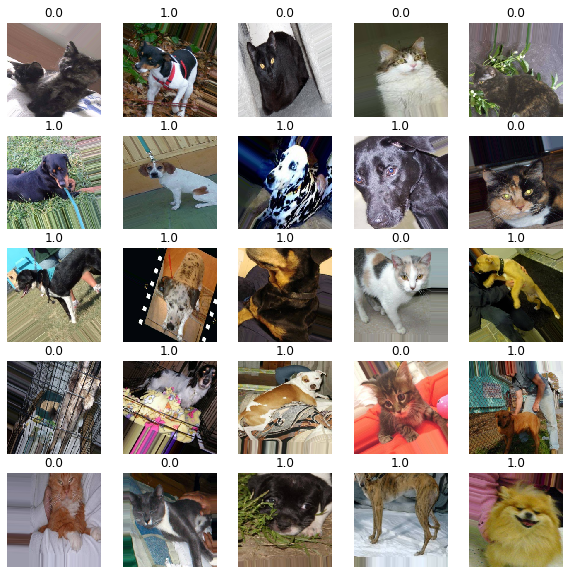

In [9]:
import matplotlib.pyplot as plt

train_img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0,
                                                     shear_range=0.2,
                                                     rotation_range=40,
                                                     zoom_range=0.2,
                                                     width_shift_range=0.2,
                                                     height_shift_range=0.2,
                                                     horizontal_flip=True,
                                                     vertical_flip=False)
test_img_gen =  tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

train_iter = train_img_gen.flow_from_directory(os.path.join(dir_path, 'train'), batch_size=64, target_size=(IMG_SIZE, IMG_SIZE), class_mode='sparse')
test_iter = test_img_gen.flow_from_directory(os.path.join(dir_path, 'test'), batch_size=64, target_size=(IMG_SIZE, IMG_SIZE), class_mode='sparse')


image_batch, label_batch = next(train_iter)

plt.figure(figsize=(10,10))
for n in range(25):
    plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(label_batch[n])
    plt.axis('off')



###### Model  학습

In [ ]:
import os

dir_path = 'cat_dog'
IMG_SIZE = 227

model = make_VGGNet(input_shape=(IMG_SIZE, IMG_SIZE), output=2)
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


epochs = 20
history = model.fit_generator(train_iter, steps_per_epoch=len(train_iter), 
                              validation_data=test_iter, validation_steps=len(test_iter),
                             epochs=epochs)

test_loss, test_acc = model.evaluate_generator(test_iter, steps=len(test_iter), verbose=0)
print("Test Accuracy:{}".format(test_acc))

# model save on Google Colab
model.save('drive/My Drive/vgg_cat_dog.h5')

drawPlot(history)

###### VGGNet 개,고양이 분류 테스트

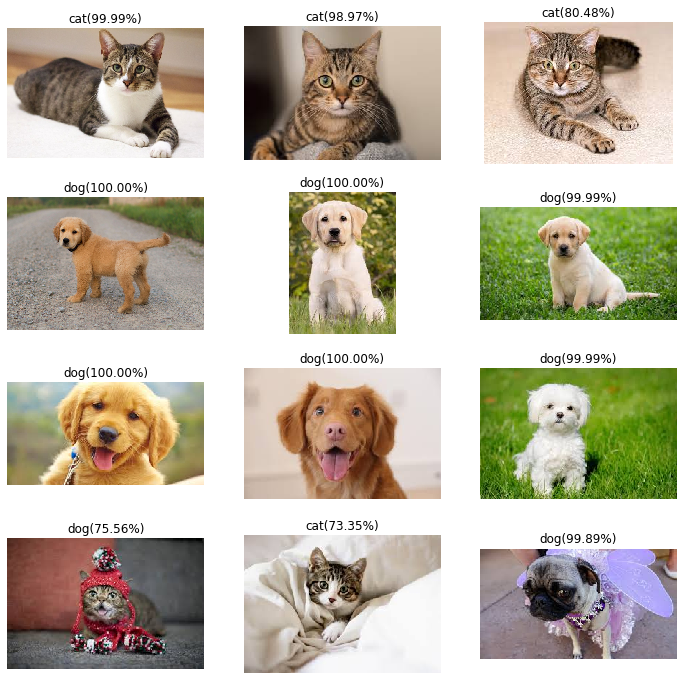

In [78]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import math

pet_dir = './img/pet/*.*'
labels = ['cat', 'dog']

model = tf.keras.models.load_model('drive/My Drive/vgg_cat_dog.h5')
paths =  glob.glob(pet_dir)
IMG_SIZE = 227
plt.figure(figsize=(12,12))
for i, path in enumerate(paths) :
    img = cv2.imread(path)[:,:,::-1]
    pet = img.copy().astype(np.float32)
    pet = cv2.resize(pet, (IMG_SIZE, IMG_SIZE))/255.0
    pet = np.expand_dims(pet, axis=0)

    pred = model.predict(pet)[0]
    label = tf.argmax(pred)
    pet_name =  labels[label.numpy()]
    
    plt.subplot(math.ceil(len(paths)/3), 3, i+1)
    plt.imshow(img)
    plt.title(f'{pet_name}({pred[label]*100:.2f}%)')
    plt.axis('off')

### GoogLeNet(Inception.v1)
* 구글 리서치, 크리스찬 세게디(Christian Szegedy)
* ILSVRC 2014 대회 우승
    * Top-5 Error 6.7%
    * 깊은 Network는 좋은 성능을 내지만 파라미터와 연산량 증가
    * Fully Connected Layer(Dense)를 최소화하고 Inception Module 추가
    * AlexNet에 비해 12배 적은 파라미터 사용
* Inception Module
    * 서브 네트워크
    * 더 깊은  CNN
        * 22층
    * 더 효과적인 파라미터 사용
        * 사이즈가 다른 여러 필터를 연결
        * 더 깊지만 전체 파라미터 갯수는 AlexNet,VGG16/VGG19 보다 더 적음
        * 1x1 Fileter : 차원 축소
    * 사로 다른 필터 결과를 하나로 결합(concatenation)
![image.png](https://i.imgur.com/QO5zTq5.png)
![image.png](https://i.imgur.com/BmFpy2m.png)

#### GoogLeNet 구성
![image.png](https://i.imgur.com/Eu4eCui.png)

### Inception V3
* GoogLeNet의 Inception V1의 개선
* Inception V2, V3
* 초기 모델에서 개선된 진화
* 효과적인 컨볼루션 필터(7x7 필터)
* 향상된 표준화, 컨볼루션의 factorization


### ResNet
* 2015년 ILSVRC 우승, MS 베이징 연구소
    * Top 5 Error 3.6%
    * 사람 분류 수준 5% 능가
* 깊은 층은 정확도가 높은가?
    * Network의 깊이와 정확성의 정비례 아님을 증명
    * 무조건 깊다고 무조건 성능이 좋지 않다.
    * 20층  > 56층
    * Degradation, varnishing 문제 
* Residual Block
    * 출력 값($F(x)$)에 입력 값($x$)을 더하기
        * $H(x) = F(x) + x$
        * $F(x) =  H(x) - x$
        * $F(x)$를 최소화(0) 하는 알고리즘
            * 잔차(Residual)
    * 출력이 입력과 같기 때문에 층의 깊이와 무관
    * 학습 목표($F(x) = 0)$가 뚜렷, 학습 속도 증가
    * 동일한 파라미터에 다양한 형태의 피쳐 
<img src="https://i.imgur.com/Dp0Jhpo.png" width="400">

* ResNet
    * VGGNet + Residual Block
    * 152층
![](https://i.imgur.com/b1NVKrF.png)

## Efficient Light Weight CNN
* 효율적이고 경량화된 Convolution Layer
    * Dialated Convolution
    * Point-Wise Convolution
    * Grouped Convolution
    * Depthwise Convolution
* 경량화 CNN 사례
    * SqueezeNet
    * MoileNet
    * SuffleNet

### SqueezeNet
* CNN 모델은 점점 깊어지는 추세
    * 모델의 크기가 커지고 파라미터 갯수가 많아진다.
    * 고성능 컴퓨팅 파워 필요
    * 저성능 컴퓨터에서는 훈련은 물론 예측도 불가능
* Landola(2016)의 논문에 의해 제안
    * 기본 아이디어
        * Feature Map은 클 수록 정확하다.
        * 채널 수는 작을 수록 빠르다.
        * 커널은 작을 수록 빠르다.
    * AlexNet과 비슷한 정확도
    * 50배 적은 파라미터
    * 0.5mB 이하의 모델 크기를 자랑
* Fire Module
    * squeeze layer
        * 1x1 Convolution 사용(3x3 대신)
        * Point-Wise Convolution
        * 차원 축소 효과
    * expand layer
        * 3x3 필터를 가능한 1x1으로 대체
![image.png](https://i.imgur.com/MqSTbSp.png)

* Network 구조, 3가지
    * Vanila SqueezeNet : Fire module 만을 중첩해서 구성
    * SqueezeNet + Simple Bypass : Fire module + Residual, 가장 뛰어난 성능
    * SqueezeNet + Complex Bypass : Fire module + Residual + Convolution bypass
![](https://i.imgur.com/VBJSgz5.png)

### MobileNet
* MobileNet = Depth-wise + Point-wise
![](https://i.imgur.com/VVITUTC.png)
* Depth-wise Convolution
    * Convolution 연산을 Depth-Wise로 변경
    * 입력 채널별 독립적인 필터(Group Convolution) 사용
    * 연산량의 선형적 증가, 스퀘어 증가 대신
        * 연산량과 파라미터 수 축소
* Point-Wise 적극적 적용
    * 차원 축소로 인한 연산속도 가속화
* 계산량 8~9배 축소
    ![image.png](https://i.imgur.com/wPyuOk3.png)
    
    

## Keras Pre-trained Models on ImageNet 
* ImageNet 1000가지 class로 훈련된 모델 제공
    * Xception
    * VGG16
    * VGG19
    * ResNet, ResNetV2, ResNeXt
    * InceptionV3
    * InceptionResNetV2
    * MobileNet
    * MobileNetV2
    * DenseNet
    * NASNet

### API
* [`keras.applications`](https://keras.io/applications/)
    * download : `~/.keras/model/`
        * xxx.h5 : 학습된 모델 
        * imagenet_class_index.json : Label 파일

### Pre Trained Model
* ResNet50 Example
* `model = ResNet50(weights='imagenet')`
    * `model.predict(x)`

[[3.58761518e-08 2.57103250e-09 1.19616885e-08 1.44444092e-08
  7.11534609e-09 8.02944484e-08 6.50600906e-10 5.94428116e-08
  1.45021053e-08 1.76519079e-05 4.51273330e-09 1.15704191e-09
  3.25517702e-09 1.36852885e-09 9.95350202e-09 8.62567706e-09
  8.20051493e-09 1.94784100e-09 9.72765957e-09 3.45048989e-09
  3.17941478e-08 7.28857117e-07 1.20568103e-07 7.33557499e-06
  5.86117110e-08 1.59994258e-08 2.37646649e-08 9.22478272e-09
  5.14402032e-09 9.46617451e-09 1.29074151e-09 7.86112342e-10
  6.66266153e-09 2.67739580e-07 2.61775227e-07 4.09555199e-08
  1.14969453e-07 7.39430339e-09 8.88000002e-08 2.03416278e-07
  8.62042659e-10 2.56126942e-08 3.04795336e-08 1.82955020e-07
  4.07414973e-08 3.73759477e-08 6.57875920e-10 7.42531512e-08
  7.45332898e-07 7.69269491e-07 9.01722963e-09 1.50212936e-05
  1.04730642e-08 6.10582074e-09 2.95174463e-08 1.54118651e-09
  1.68114711e-09 6.58370525e-10 7.92065258e-09 2.28436221e-08
  1.10270877e-08 1.48068180e-08 1.05130781e-07 1.66161499e-07
  3.4913

(-0.5, 223.5, 223.5, -0.5)

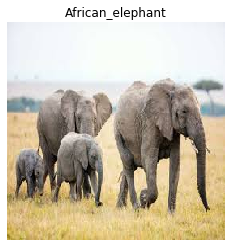

In [117]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE=224
model = ResNet50(weights='imagenet')

img_path = './img/elephant.jpg'
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print(preds)
print('argmax:', np.argmax(preds))

decoded = decode_predictions(preds, top=3)[0]
print('top 3 decoded prediction:', decoded)

plt.imshow(img)
plt.title(decoded[0][1])
plt.axis('off')

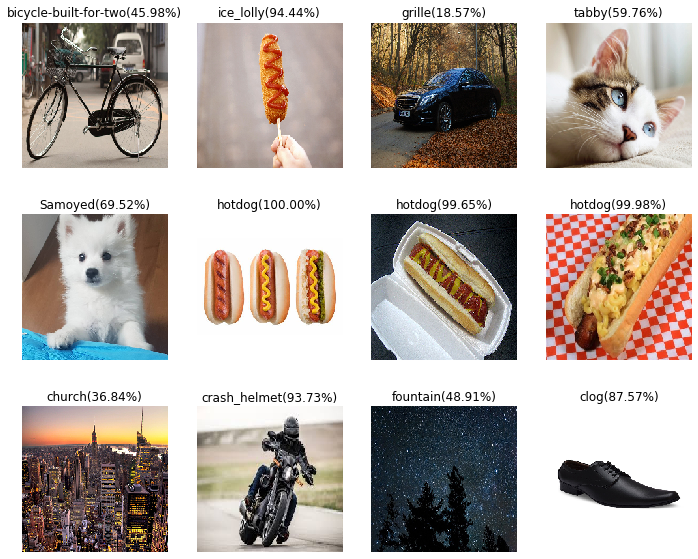

In [118]:
import glob

test_dir_path = './img/examples/*.*'
test_paths = glob.glob(test_dir_path)

plt.figure(figsize=(12,10))
for i, path in enumerate(test_paths):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
    img_arr = tf.keras.preprocessing.image.img_to_array(img)#, dtype=np.uint8)
    img_arr = tf.expand_dims(img_arr, 0)

    pred = model.predict(preprocess_input(img_arr))
    decoded = decode_predictions(pred)[0]
    plt.subplot(math.ceil(len(test_paths)/4), 4, i+1)
    plt.imshow(img)
    plt.title(f'{decoded[0][1]}({decoded[0][2]*100:.2f}%)')
    plt.axis('off')
plt.show()

### MobilNet을 이용한 개,고양이 분류 학습
* `keras.applications.mobilenet.MobileNet(input_shape, include_top, weights, classes)`
    * `weights` : `None` or 'imagenet'
        * `None` : random 초기화, 훈련되지 않은 모델
    * `input_shape` : 입력 이미지 크기
    * `classes` : 출력 클래스 갯수
    * `include_top` :  마지막 레이어 추가 여부


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

IMG_SIZE = 227
dir_path = 'cat_dog'
'''
split=['train[:80%]', 'train[80%:90%]', 'train[90%:]']
(raw_train, raw_valid, raw_test), dsinfo = tfds.load('cats_vs_dogs',
                                               split=split,
                                               with_info=True,
                                               as_supervised=True)

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/255.0)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

train = raw_train.map(format_example)
valid = raw_valid.map(format_example)
test = raw_test.map(format_example)
'''

train_img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0,
                                                     shear_range=0.2,
                                                     rotation_range=40,
                                                     zoom_range=0.2,
                                                     width_shift_range=0.2,
                                                     height_shift_range=0.2,
                                                     horizontal_flip=True,
                                                     vertical_flip=False)
test_img_gen =  tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

train_iter = train_img_gen.flow_from_directory(os.path.join(dir_path, 'train'), batch_size=64, target_size=(IMG_SIZE, IMG_SIZE), class_mode='sparse')
test_iter = test_img_gen.flow_from_directory(os.path.join(dir_path, 'test'), batch_size=64, target_size=(IMG_SIZE, IMG_SIZE), class_mode='sparse')



model = tf.keras.applications.mobilenet.MobileNet(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights=None, dropout=0.5, classes=2)
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

batch_size = 62
epochs = 20
test_loss, test_acc = model.evaluate_generator(test_iter, steps=len(test_iter), verbose=0)
print("Before Test Accuracy:{}".format(test_acc))

model.fit_generator(train_iter, steps_per_epoch=len(train_iter), 
                              validation_data=test_iter, validation_steps=len(test_iter),
                             epochs=epochs)

test_loss, test_acc = model.evaluate_generator(test_iter, steps=len(test_iter), verbose=0)
print("After Test Accuracy:{}".format(test_acc))


'''
test_loss, test_acc = model.evaluate(test.batch(batch_size))
print("Before Training Test Accuracy:{}".format(test_acc))

#cb=tf.keras.callbacks.EarlyStopping(patience=3)
history = model.fit(train.batch(batch_size), epochs=15,  validation_data=valid.batch(batch_size))

test_loss, test_acc = model.evaluate(test.batch(batch_size))
print("After Training Test Accuracy:{}".format(test_acc))
'''

Found 18840 images belonging to 2 classes.
Found 6160 images belonging to 2 classes.
Model: "mobilenet_1.00_227"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 228, 228, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 113, 113, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 113, 113, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 113, 113, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 113, 113, 32)      288       
_____________________________

  ...
    to  
  ['...']
Before Test Accuracy:0.5003246665000916
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 295 steps, validate for 97 steps
Epoch 1/20
295/295 [==============================] - 228s 774ms/step - loss: 0.7279 - accuracy: 0.5641 - val_loss: 0.6934 - val_accuracy: 0.4997
Epoch 2/20
295/295 [==============================] - 249s 843ms/step - loss: 0.7061 - accuracy: 0.5848 - val_loss: 0.8038 - val_accuracy: 0.5003
Epoch 3/20
295/295 [==============================] - 251s 853ms/step - loss: 0.6926 - accuracy: 0.5975 - val_loss: 0.6279 - val_accuracy: 0.6500
Epoch 4/20
295/295 [==============================] - 252s 854ms/step - loss: 0.6708 - accuracy: 0.6186 - val_loss: 0.6093 - val_accuracy: 0.6631
Epoch 5/20
295/295 [==============================] - 257s 872ms/step - loss: 0.6547 - accuracy: 0.6294 - val_loss: 0.6581 - val_accuracy: 0.6205
Epoch 6/20
295/295 [================

'\ntest_loss, test_acc = model.evaluate(test.batch(batch_size))\nprint("Before Training Test Accuracy:{}".format(test_acc))\n\n#cb=tf.keras.callbacks.EarlyStopping(patience=3)\nhistory = model.fit(train.batch(batch_size), epochs=15,  validation_data=valid.batch(batch_size))\n\ntest_loss, test_acc = model.evaluate(test.batch(batch_size))\nprint("After Training Test Accuracy:{}".format(test_acc))\n'

In [2]:
model.save('mobilenet_cat_dog_gen.h5')